**M504 AI and Applications**

Name: Dhruv Dharwal

Student id: GH1035710



**Business Context**

The client company, which is a motorcycle retailing business, deals with a diverse set of motorcycles from various brands. They record detailed information regarding their products, including key features such as brand, model, engine capacity, fuel type, price, year of manufacture, mileage, and resale price, among others. The company also records information on vehicle ownership and state-level details such as the average daily distance covered and city tier.
The company wants to use this data to further analysis their sales performance, pricing, motorcycle value retention, and market trends. As part of this project, they need assistance in answering some business-critical questions to facilitate better decision-making. Below are the business questions the company would like to know:

• What are the leading motorcycle brands and models with the highest resale value?

• Is mileage (km/l) related to resale price?

• What is the most common engine capacity range for the top-selling brand?

• Are more recent motorcycles (more recent production years) at significantly higher resale value?

• Which states have the most and least total sales of motorcycles?

• Which fuel type has the highest average resale value, and which type has the lowest?

As a data science consultant, I have been requested to carry out an exploratory data analysis (EDA) to answer the following questions. The goal is to come up with actionable conclusions that can be utilized by the company to streamline their sales strategies, forecast future pricing trends, and improve customer targeting according to the characteristics of the motorcycles they deal in.
Through this EDA pipeline, I will unlock insights and relationships in their dataset that are valuable, inform their data-driven decision-making, and highlight areas where their firm can improve its overall performance and profitability.


Importing required libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Loading Dataset

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/DDdhruv/Dataset/refs/heads/main/bike_sales_india_dataset.csv')
df

,State,Avg Daily Distance (km),Brand,Model,Price (INR),Year of Manufacture,Engine Capacity (cc),Fuel Type,Mileage (km/l),Owner Type,Registration Year,Insurance Status,Seller Type,Resale Price (INR),City Tier
0,Karnataka,68.84,Royal Enfield,Hunter 350,252816.0,2021.0,672.0,Electric,78.41,Second,2024.0,Active,Individual,149934.18,Tier 3
1,Rajasthan,23.80,Bajaj,Dominar 400,131100.0,2020.0,769.0,Hybrid,89.98,Third,2023.0,Active,Individual,66960.30,Tier 3
2,Madhya Pradesh,27.67,KTM,125 Duke,201016.0,2020.0,216.0,Hybrid,71.46,Second,2023.0,Active,Dealer,141522.64,Tier 3
3,Karnataka,62.85,Kawasaki,Ninja 300,132482.0,2021.0,556.0,Petrol,51.73,Third,2021.0,Active,Dealer,56057.22,Tier 1
4,Madhya Pradesh,10.62,Yamaha,FZ V3,231796.0,2019.0,298.0,Petrol,54.72,Third,2019.0,Not Available,Individual,132538.36,Tier 3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Gujarat,67.72,Hero,Passion Pro,95040.0,2024.0,297.0,Electric,88.03,Third,2024.0,Not Available,Dealer,62025.20,Tier 1
9996,Delhi,19.94,Bajaj,CT 100,110369.0,2015.0,210.0,Hybrid,NaN,Third,2020.0,Active,Individual,80378.40,Tier 2
9997,West Bengal,79.95,Bajaj,Pulsar 150,313806.0,2018.0,267.0,Hybrid,76.78,First,2018.0,Expired,Dealer,199506.70,Tier 2
9998,Madhya Pradesh,16.07,Honda,Dio,204068.0,2018.0,856.0,Electric,97.75,Second,2021.0,Active,Individual,130978.70,Tier 3


**Data Exploration**

From this, I got to know the DataType and how much the Non-Null are there in each column.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   State                    9900 non-null   object 
 1   Avg Daily Distance (km)  9800 non-null   float64
 2   Brand                    9700 non-null   object 
 3   Model                    9800 non-null   object 
 4   Price (INR)              9900 non-null   float64
 5   Year of Manufacture      9800 non-null   float64
 6   Engine Capacity (cc)     9900 non-null   float64
 7   Fuel Type                9900 non-null   object 
 8   Mileage (km/l)           9800 non-null   float64
 9   Owner Type               9900 non-null   object 
 10  Registration Year        9800 non-null   float64
 11  Insurance Status         9900 non-null   object 
 12  Seller Type              9800 non-null   object 
 13  Resale Price (INR)       9800 non-null   float64
 14  City Tier              

In this, I am calculating the total number of null values in each column.

In [ ]:
df.isna().sum()

,0
State,100
Avg Daily Distance (km),200
Brand,300
Model,200
Price (INR),100
Year of Manufacture,200
Engine Capacity (cc),100
Fuel Type,100
Mileage (km/l),200
Owner Type,100


I'm calculating the percentage for null values for every column and total proportion of missing values in the DataFrame. This information is significant for the data cleaning and preprocessing decisions.

In [ ]:
column_percent = df.isnull().sum() * 100 / len(df)
print("Column                     Percentage")
print(column_percent)

total_percentage = df.isnull().sum().sum() * 100 / (df.shape[0] * df.shape[1])

print(f"\nTotal Missing Percentage: {total_percentage:.2f}%")

Column                     Percentage
State                      1.0
Avg Daily Distance (km)    2.0
Brand                      3.0
Model                      2.0
Price (INR)                1.0
Year of Manufacture        2.0
Engine Capacity (cc)       1.0
Fuel Type                  1.0
Mileage (km/l)             2.0
Owner Type                 1.0
Registration Year          2.0
Insurance Status           1.0
Seller Type                2.0
Resale Price (INR)         2.0
City Tier                  2.0
dtype: float64

Total Missing Percentage: 1.67%


 From above step, I decide to drop all rows with mussing values as only 1.67% data is null and this is insignificant for the result.

**Data Preprocessing**

In [ ]:
df_cleaned = df.dropna()
df_cleaned

,State,Avg Daily Distance (km),Brand,Model,Price (INR),Year of Manufacture,Engine Capacity (cc),Fuel Type,Mileage (km/l),Owner Type,Registration Year,Insurance Status,Seller Type,Resale Price (INR),City Tier
0,Karnataka,68.84,Royal Enfield,Hunter 350,252816.0,2021.0,672.0,Electric,78.41,Second,2024.0,Active,Individual,149934.18,Tier 3
1,Rajasthan,23.80,Bajaj,Dominar 400,131100.0,2020.0,769.0,Hybrid,89.98,Third,2023.0,Active,Individual,66960.30,Tier 3
2,Madhya Pradesh,27.67,KTM,125 Duke,201016.0,2020.0,216.0,Hybrid,71.46,Second,2023.0,Active,Dealer,141522.64,Tier 3
3,Karnataka,62.85,Kawasaki,Ninja 300,132482.0,2021.0,556.0,Petrol,51.73,Third,2021.0,Active,Dealer,56057.22,Tier 1
4,Madhya Pradesh,10.62,Yamaha,FZ V3,231796.0,2019.0,298.0,Petrol,54.72,Third,2019.0,Not Available,Individual,132538.36,Tier 3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,Gujarat,52.94,Honda,Dio,170094.0,2024.0,480.0,Petrol,30.03,Third,2024.0,Not Available,Dealer,101953.09,Tier 2
9995,Gujarat,67.72,Hero,Passion Pro,95040.0,2024.0,297.0,Electric,88.03,Third,2024.0,Not Available,Dealer,62025.20,Tier 1
9997,West Bengal,79.95,Bajaj,Pulsar 150,313806.0,2018.0,267.0,Hybrid,76.78,First,2018.0,Expired,Dealer,199506.70,Tier 2
9998,Madhya Pradesh,16.07,Honda,Dio,204068.0,2018.0,856.0,Electric,97.75,Second,2021.0,Active,Individual,130978.70,Tier 3


Checking the DataFrame whether the rows with null values dropped or not.

In [ ]:
df_cleaned.isna().sum()

,0
State,0
Avg Daily Distance (km),0
Brand,0
Model,0
Price (INR),0
Year of Manufacture,0
Engine Capacity (cc),0
Fuel Type,0
Mileage (km/l),0
Owner Type,0


**Explanatory Data Analysis**

**1. What are the leading motorcycle brands and models with the highest resale value?**

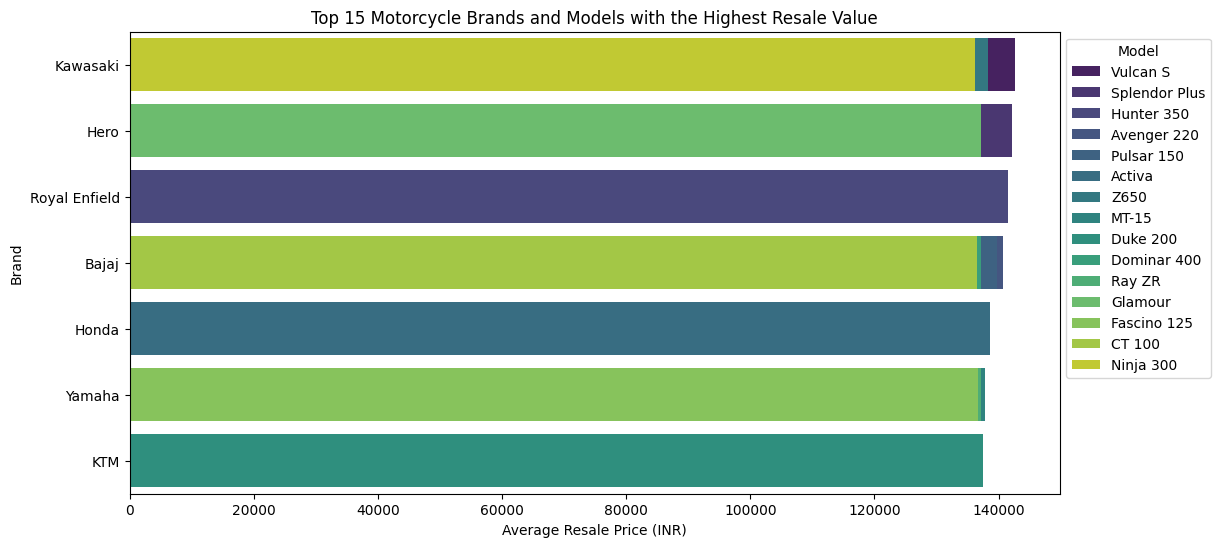

In [ ]:
Resale = df_cleaned.groupby(['Brand', 'Model'])['Resale Price (INR)'].mean().reset_index()

Resale = Resale.sort_values(by='Resale Price (INR)', ascending=False).head(15)

plt.figure(figsize=(12,6))
sns.barplot(x='Resale Price (INR)', y='Brand', hue='Model', data=Resale, dodge=False, palette='viridis')

plt.xlabel("Average Resale Price (INR)")
plt.ylabel("Brand")
plt.title("Top 15 Motorcycle Brands and Models with the Highest Resale Value")
plt.legend(title="Model", bbox_to_anchor=(1,1))
plt.show()

From this horizontal bar chart, I become to know the brand and models that retain their value better in the resale market. Longer bars shows the higher resale value and could see which brands and models are mostly desired when resold.

**2. Is mileage (km/l) related to resale price?**

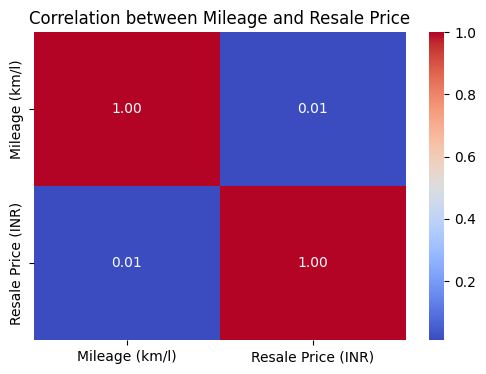

In [ ]:
correlation = df_cleaned[['Mileage (km/l)', 'Resale Price (INR)']].corr()

plt.figure(figsize=(6,4))
sns.heatmap(correlation, annot=True, cmap='coolwarm', cbar=True, fmt='.2f')

plt.title("Correlation between Mileage and Resale Price")
plt.show()

From this heatmap, It is showing the relation between the mileage and resale price. In general, a correlation quantity between 0.3 and 0.5 is considered a moderate positive correlation which means there's a clear relationship between mileage and resasle price, however it is not a very strong or predictable relationship.

**3. What is the most common engine capacity range for the top-selling brand?**


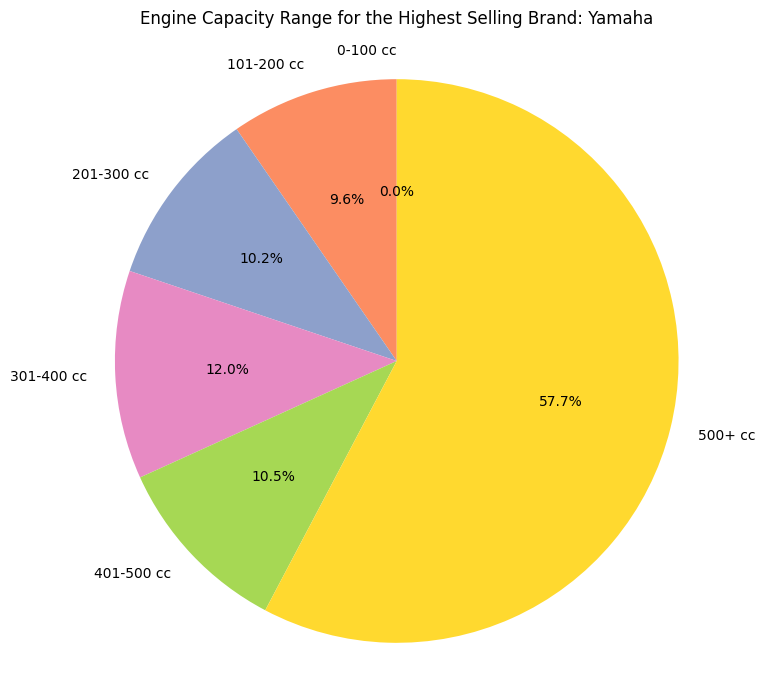

In [ ]:
bin = [0, 100, 200, 300, 400, 500, float('inf')]
label = ['0-100 cc', '101-200 cc', '201-300 cc', '301-400 cc', '401-500 cc', '500+ cc']

df_cleaned.loc[:, 'Engine Capacity Range'] = pd.cut(df_cleaned['Engine Capacity (cc)'], bins=bin, labels=label, right=False)

sales = df_cleaned.groupby('Brand')['Avg Daily Distance (km)'].count().reset_index(name='Total Sold')

highest_selling_brand = sales.sort_values(by='Total Sold', ascending=False).iloc[0]['Brand']

brand_data = df_cleaned[df_cleaned['Brand'] == highest_selling_brand]

engine_capacity_distribution = brand_data.groupby('Engine Capacity Range', observed=False).size().reset_index(name='Count')

plt.figure(figsize=(8, 8))
plt.pie(engine_capacity_distribution['Count'],
        labels=engine_capacity_distribution['Engine Capacity Range'],
        autopct='%1.1f%%',
        startangle=90,
        colors=sns.color_palette('Set2', len(engine_capacity_distribution)))

plt.title(f"Engine Capacity Range for the Highest Selling Brand: {highest_selling_brand}\n")
plt.axis('equal')
plt.show()

Fromt this pie plot, I identify the most common engine capacity range for the highest selling brand. Each slice in the pie chart shows the percentage of motorcycles within that engine capacity range and checks the dominant engine capacity preference for the brand's customers.

**4. Are more recent motorcycles (more recent production years) at significantly higher resale value?**


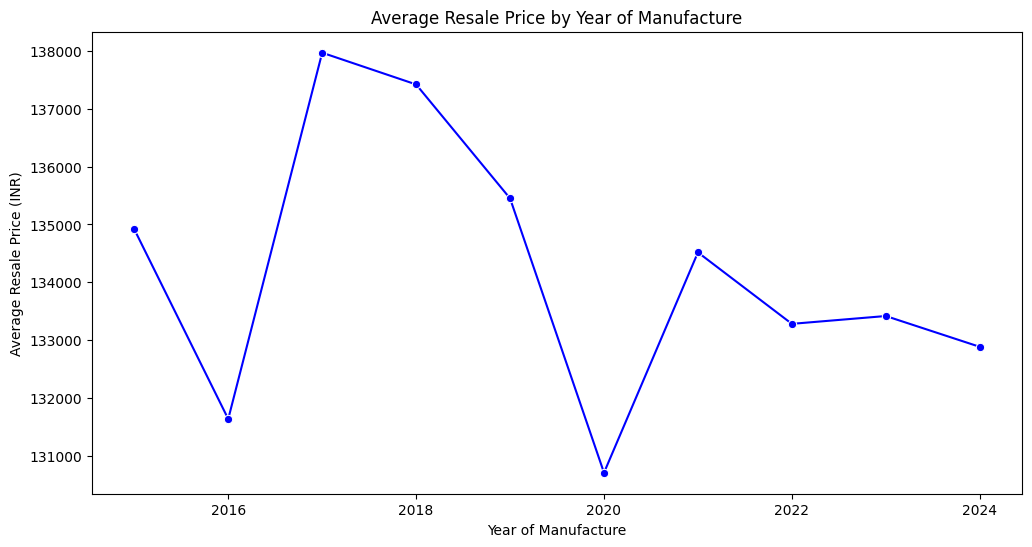

In [ ]:
year_price = df_cleaned.groupby('Year of Manufacture')['Resale Price (INR)'].mean().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(x='Year of Manufacture', y='Resale Price (INR)', data=year_price, marker='o', color='blue')

plt.xlabel("Year of Manufacture")
plt.ylabel("Average Resale Price (INR)")
plt.title("Average Resale Price by Year of Manufacture")
plt.show()

From this line plot, I could see the trends of average resale price for different manufacturing years. The points with the line representing the average resale price for each year. In 2020 due to COVID, sales fall drastically.

**5. Which states have the most and least total sales of motorcycles?**


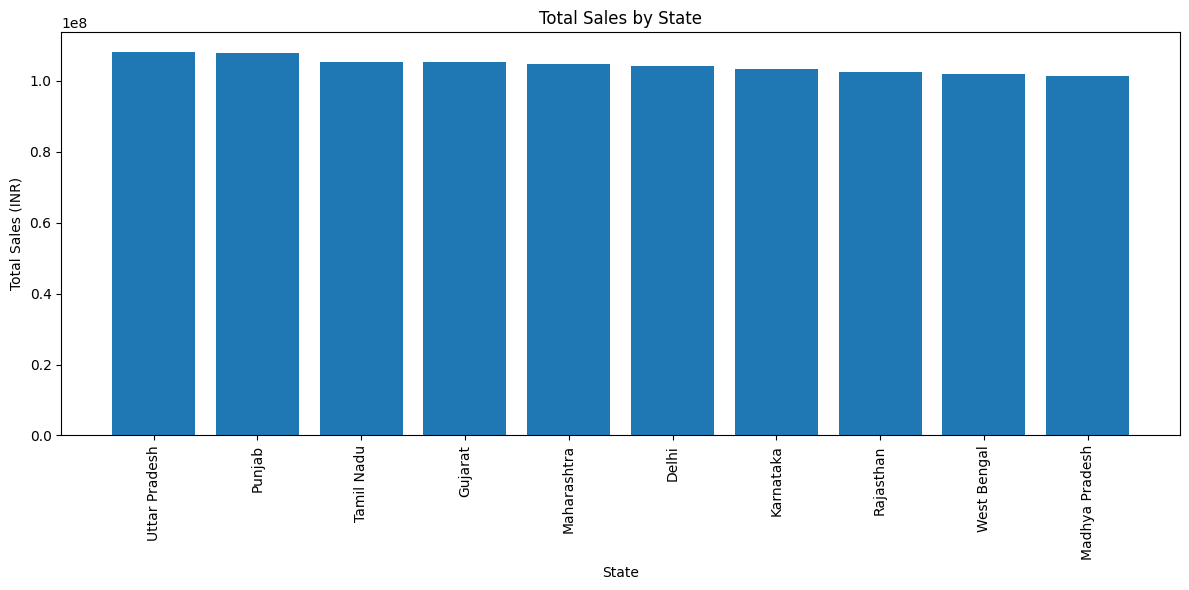

In [ ]:
sales = df_cleaned.groupby('State')['Resale Price (INR)'].sum().reset_index()
sales = sales.sort_values(by='Resale Price (INR)', ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(sales['State'], sales['Resale Price (INR)'])

plt.xlabel("State")
plt.ylabel("Total Sales (INR)")
plt.title("Total Sales by State")
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

In this vertical bar graph, the total sales of motorcycle for each state has been represented. Through this, I saw the most and the least sales of the motorcycle in a specific state which could be used for targeted marketing and sales stretegies in a particular states.

**6. Which fuel type has the highest average resale value, and which type has the lowest?**

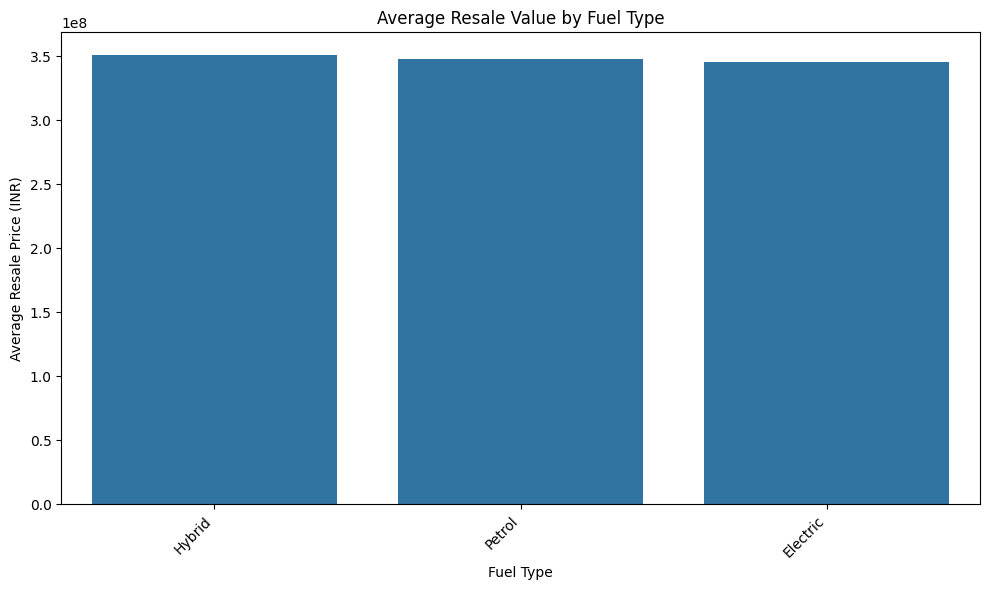

In [ ]:
resale_by_fuel = df_cleaned.groupby('Fuel Type')['Resale Price (INR)'].sum().reset_index()
resale_by_fuel = resale_by_fuel.sort_values(by='Resale Price (INR)', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Fuel Type', y='Resale Price (INR)', data=resale_by_fuel)
plt.title('Average Resale Value by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Average Resale Price (INR)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In this bar chart, it represents the average resale value of different fuel types for motorcycles. From this, we could check preference of fuel type in the resale market.

**Conclusion**

The exploratory data analysis revealed some insightful information in the motorcycle sales data set, answering significant business questions and revealing some possible improvement areas. The findings can be leveraged to:

•	Maximize sales strategies: Through focus on winning brands, models, and engine capacity categories.

•	Foresee future price trends: On the basis of the relationship between mileage, manufacturing year, and resale price.

•	Maximize customer targeting: On the basis of geographical preference and fuel type preference.

•	Improve overall performance and profitability: By making well-informed decisions based on fact-driven insights gathered from the analysis.


In general, the analysis suggests that:

•	Certain motorbike models and brands retain value well in the second-hand market.

•	Year of production and mileage have an impact on resale price, but there are other variables involved.

•	There are regional variations in sales performance, and marketing in some states can be useful.

•	Customer demand for engine capacity and fuel type needs to be considered for inventory and marketing.

Based on these results, the motorcycle retailing firm can make strategic choices to improve their operations and achieve their business objectives.
